In [7]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm
import importlib

import simulate
importlib.reload(simulate)
from simulate import *

## Gamma solver

Natural length scale L_N = 10.0
L/L_N = 30.0
L_N/dx = 50.0
Loading u_sols/solution_D_1_v_0.99_a_0.1_wind_0_coff_0.1_N_1501_dx_0.2.npy


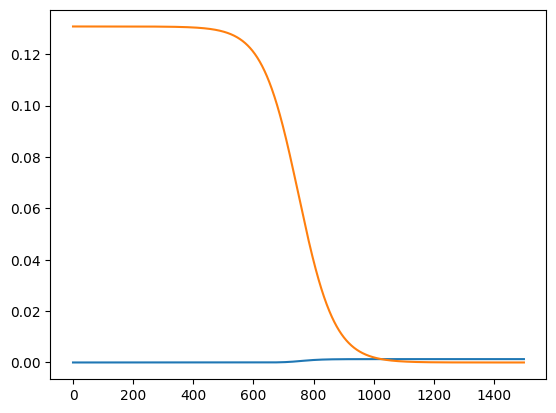

Max time T/T_N: 800.0


100%|██████████| 799999/799999 [00:57<00:00, 13917.35it/s]

Final relative number difference: -2.024730194505331e-06


In [99]:
import simulate
importlib.reload(simulate)
from simulate import *

D = 1.0  # Diffusion coefficient
a = 0.1  # growth rate 
coff = 0.1#1 #  strength of u^2 non-linearity 
wind = 0.0 #  strength of u'^2 non-linearity 
vf = 2 * (D*a)**0.5
# Lattice
L_N = np.sqrt(D)/a
print("Natural length scale L_N =", L_N)
L = 300.0  # Length of the domain
dx = 0.2# Spatial step size
N = int(L / dx) + 1
print(f"L/L_N = {L/L_N}")
print(f"L_N/dx = {L_N/dx}")

V = 0.99
filename="u_sols/"+get_filename(D,V,a,wind,coff,N,dx, bc='mixed')
print("Loading", filename)
u_sol = np.load(filename)[-1]

bc = "dirichlet"
g_0 = sigmoid_initial(L, N, 100, bc=bc, growing=False)
integral = np.sum(g_0*u_sol*dx)
g_0 = g_0 / (integral)
plt.plot(u_sol/integral)
plt.plot(g_0)
plt.show()

M = 800000
save_skip=10000
dt = 0.01
print(f"Max time T/T_N: {M*dt/(1/a)}")
gs = simulate_g(g_0, u_sol, bc, D, V, a, wind, coff, N, M, dx, dt, debug=False, save_skip=save_skip, save=False)

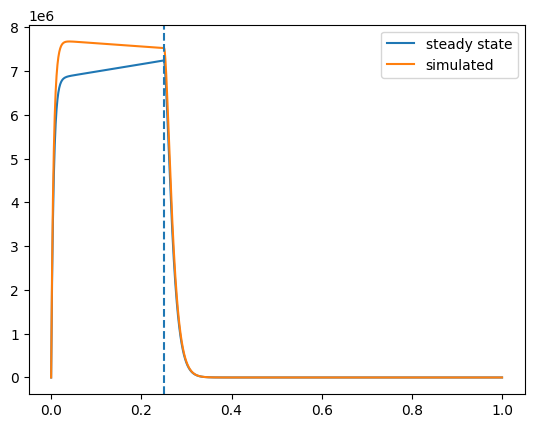

In [100]:
x = np.arange(0,L+dx,dx)
v = V*vf
c_SS = u_sol*np.exp(-v*x/D-2*wind*u_sol/D)
plt.plot(x/L, c_SS/np.sum(c_SS*u_sol*dx), label="steady state")
plt.plot(x/L, gs[-1], label="simulated")
#plt.yscale("log")
plt.legend()
plt.axvline(0.25, linestyle="--")

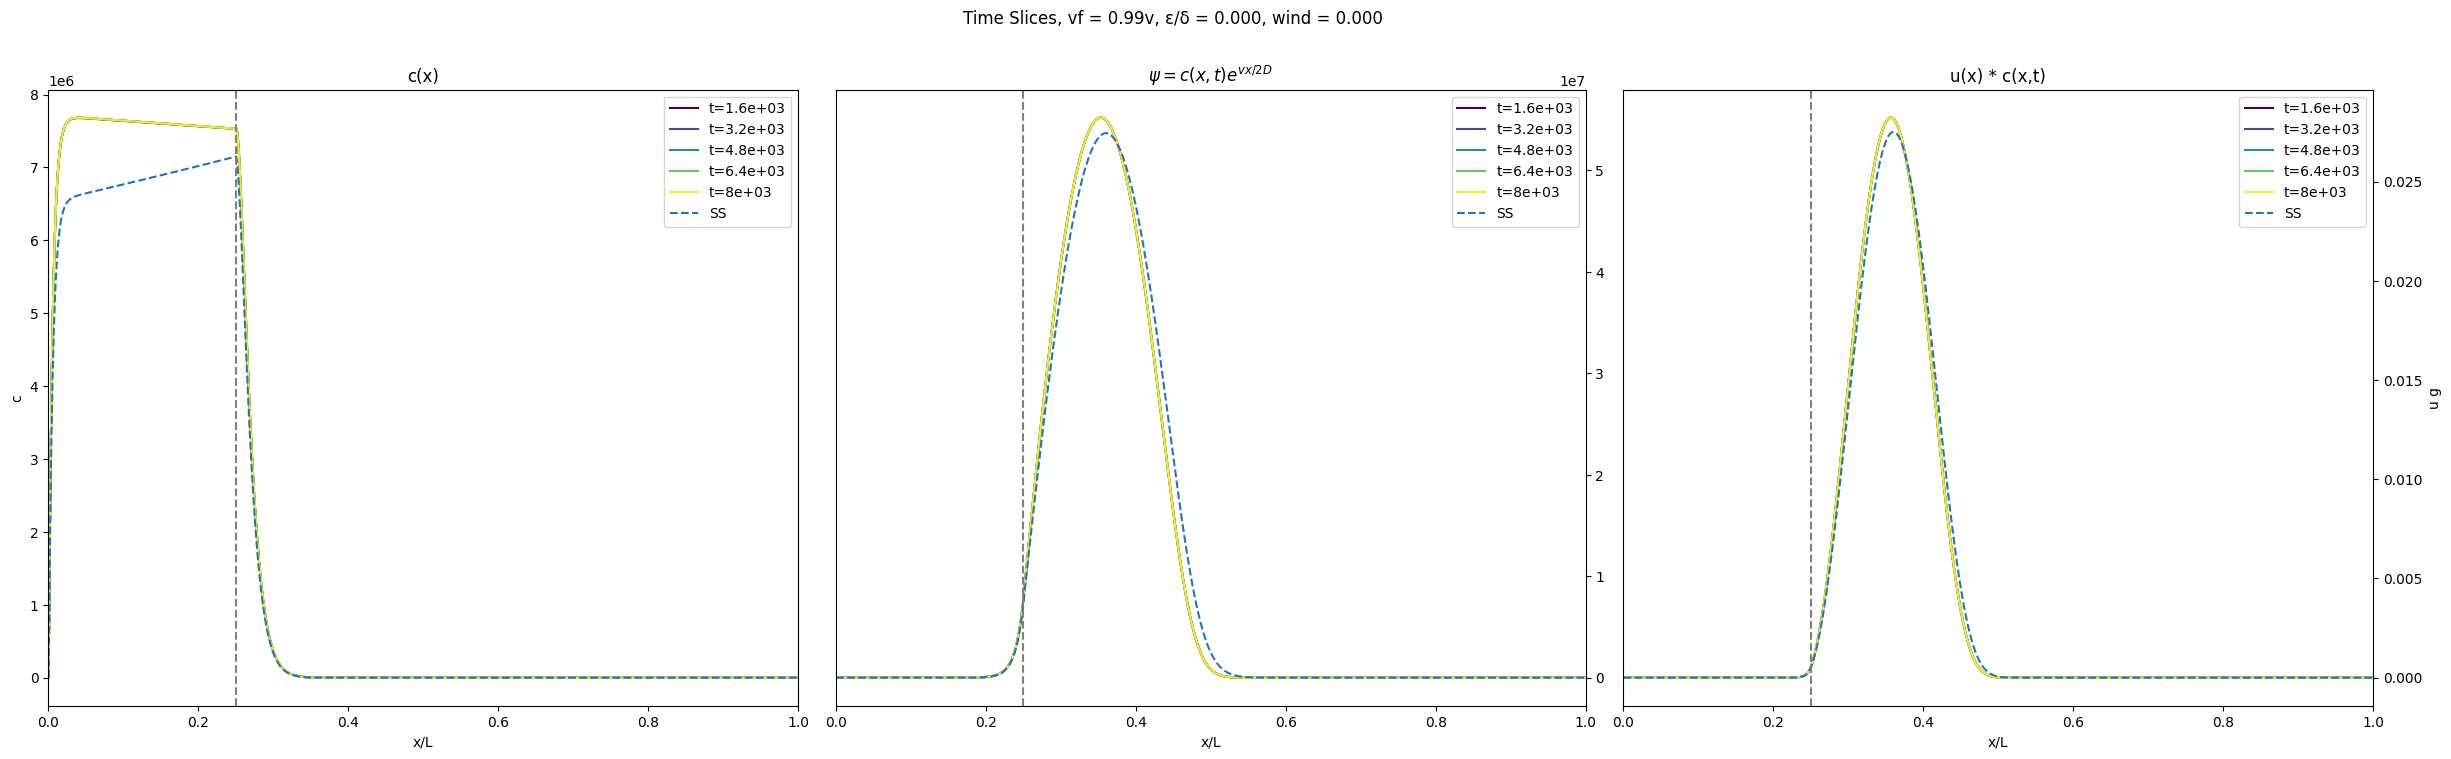

In [101]:
importlib.reload(simulate)
from simulate import *
if coff != 0: eps_over_delta = wind/coff
else: eps_over_delta = 0
plot_g_time_slices(u_sol, gs, L, dt, N, M, V, D, a, eps_over_delta, wind=wind, save_skip=save_skip, psi=True, 
                 log_scale=False, xlim=(0.0,1.0), exact=True)#, ylim=(0,100))

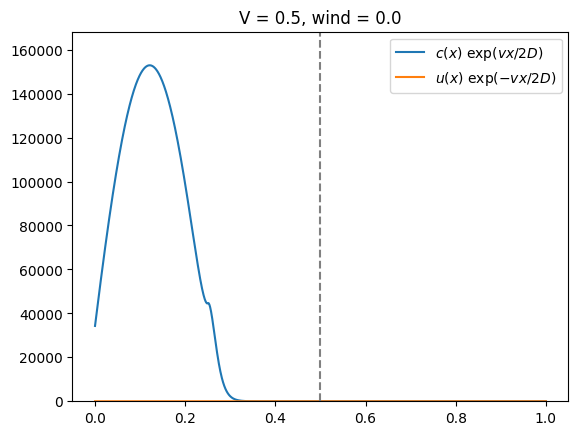

In [85]:
x = np.linspace(0, 1, N, dtype='f')
v = V * 2 * (D*a)**0.5
factor = (-x*L+0*L/4) * v / (2 * D)
psi = np.exp(np.log(np.maximum(gs[-1],0)+1e-100) - factor)
plt.plot(x, psi, label=r"$c(x) \ \exp(vx/2D)$")
psi_u = np.exp(np.log(np.maximum(u_sol,0)+1e-100) + factor)
plt.title(f"V = {V}, wind = {wind}")
psi_u *= psi[N//2]/psi_u[N//2]
plt.plot(x, psi_u, label=r"$u(x) \ \exp(-vx/2D)$")
plt.ylim((0,1.1*max(psi)))
#plt.yscale("log")
plt.legend()
plt.axvline(0.5, linestyle='--', color='gray')

In [77]:
import simulate
importlib.reload(simulate)
from simulate import *

D = 1.0  # Diffusion coefficient
a = 0.1  # growth rate 
coff = 0.1 #  strength of u^2 non-linearity 
#winds = np.ones(5)*0.0#
winds = [0.0]#0.0, 1.0, 5.0, 10.0, 50.0,100.0]
Vs = np.ones_like(winds)*0.9
#Vs = [0.2, 0.02, 0.05]
#vs = [0.99]#, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
dt = 0.01
M = 50000

#Vs = [0.01, 0.01, 0.02, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.93, 0.94, 0.95]
#Vs =[0.96, 0.97, 0.98, 0.99]
#Vs =[0.995]
#winds=np.ones_like(Vs)*100.0

params = [[D, Vs[i], a, winds[i], coff, N, dx, dt] for i in range(len(Vs))]
g_sweep(params, M, dt, bc='dirichlet', save_skip=10000, load_g=True, plot_func=0)

Missing file for u(x): u_sols/solution_d_D_1_v_0.9_a_0.1_wind_0_coff_0.1_N_2501_dx_0.2.npy
File 'g_sols/solution_d_D_1_v_0.9_a_0.1_wind_0_coff_0.1_N_2501_dx_0.2.npy' NOT found. Using sigmoidal initial condition.


UnboundLocalError: cannot access local variable 'u_sol' where it is not associated with a value

In [334]:
import simulate
importlib.reload(simulate)
from simulate import *
process_gs()
D = 1.0
a = 0.1
N = 1501
dx = 0.2
params=[#[D, a, 10.0, 0, N, dx], [D, a, 1.0, 0, N, dx], [D, a, 0.1, 0, N, dx], 
        [D, a, 100.0, 0.1, N, dx],
        [D, a, 50.0, 0.1, N, dx],
        [D, a, 10.0, 0.1, N, dx],
        [D, a, 5.0, 0.1, N, dx],
        [D, a, 1.0, 0.1, N, dx],
        [D, a, 0.0, 0.1, N, dx]]
plot_nonlin_vs_NI("g_sols/g_data.csv", params, power=1/3, log=True, ylog=True, loc='upper right')#, ylim_c=(5e-7,2*.041), ylim_w=(1e-9,2*0.0004), ylog=True)#D, a, wind, coff, N, dx)

NameError: name 'bc' is not defined

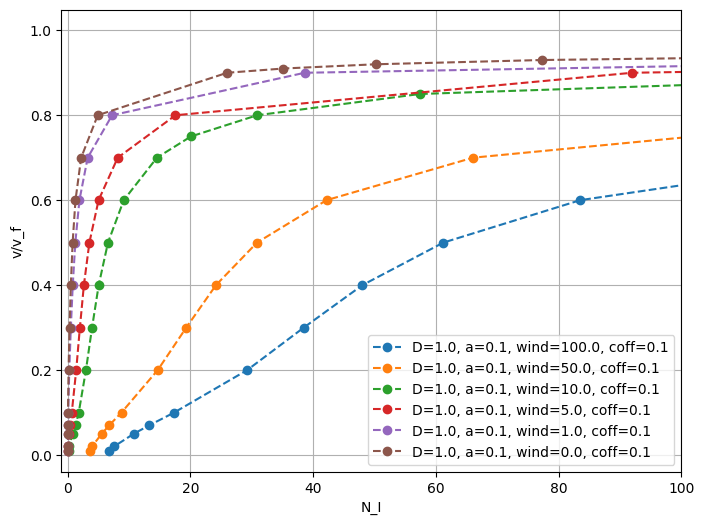

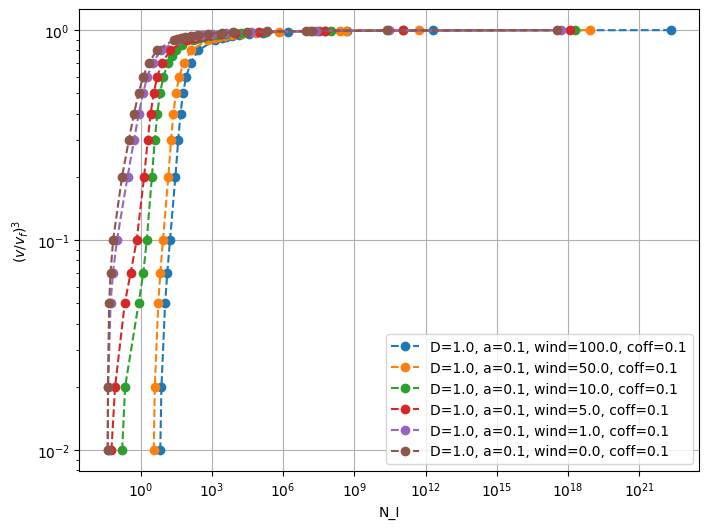

In [109]:
plot_number_of_islands("g_sols/g_data.csv", params, xlim=(-1,100),one_minus=False, log=False,ylog=False)#D, a, wind, coff, N, dx)
plot_number_of_islands("g_sols/g_data.csv", params, power=3, one_minus=False, log=True,ylog=True)